# Install the Libraries in the virutal envoironment kernel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data set 

In [2]:
#load data
df  = sns.load_dataset('tips')
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
import openpyxl

## Saving the dataset to csv and excel file

In [4]:

df.to_csv('../data/tips_data.csv', index=False)
df.to_excel('../data/tips_data.xlsx', index=False)  # requires openpyxl package


# Data: 
 1. Data composition
 2. Distribution
 3. Comparison
 4. Relationship

# 1. Data Composition

In the data composition we check: 
1. The structure of the dataset (rows and columns)
2. The data types of each column
3. The presence of missing values
4. Basic statistics (mean,median,mode) for numerical columns
5. Distribution of categorical variables

In [5]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
!pip install statsmodels scipy

In [7]:
# --- 1. Data Composition Report ---
# 1. The structure of the dataset (rows and columns)
print("Shape of the dataset:", df.shape) 

# 2. Data types of each column
print("\nData Types:\n", df.dtypes)

# 3. Missing values in each column
print("\nMissing Values:\n", df.isnull().sum())

# sum of missing values
print("\nTotal Missing Values:\n", df.isnull().sum().sum())


Shape of the dataset: (244, 7)

Data Types:
 total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

Missing Values:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Total Missing Values:
 0


In [8]:
# 4. Unique values in each column
print("\nUnique Values:\n", df.nunique())


Unique Values:
 total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64


In [9]:

# 5. Basic statistics for numerical columns (mean, median, mode, std, min, max, quartiles)
print("\nBasic Statistics:\n", df.describe())

# Median for numerical columns
print("\nMedian for numerical columns:\n", df.median(numeric_only=True))

# Mode for numerical columns
print("\nMode for numerical columns:\n", df.mode(numeric_only=True).iloc[0])


Basic Statistics:
        total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000

Median for numerical columns:
 total_bill    17.795
tip            2.900
size           2.000
dtype: float64

Mode for numerical columns:
 total_bill    13.42
tip            2.00
size           2.00
Name: 0, dtype: float64


In [10]:
print("Categorical Variables Summary:")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
   print(f"\n{col}:")
   print(df[col].value_counts())
   print(f"Unique values: {df[col].nunique()}")

Categorical Variables Summary:

sex:
sex
Male      157
Female     87
Name: count, dtype: int64
Unique values: 2

smoker:
smoker
No     151
Yes     93
Name: count, dtype: int64
Unique values: 2

day:
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
Unique values: 4

time:
time
Dinner    176
Lunch      68
Name: count, dtype: int64
Unique values: 2


# 2. Data Composition Interpretation
The tips dataset contains 244 observations with 7 variables. The dataset is complete with no missing values, which is excellent for analysis. We have 4 numerical variables (total_bill, tip, size) and 3 categorical variables (sex, smoker, day, time). The data represents restaurant tips with key metrics like bill amount, tip amount, party size, and demographic information.

In [11]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

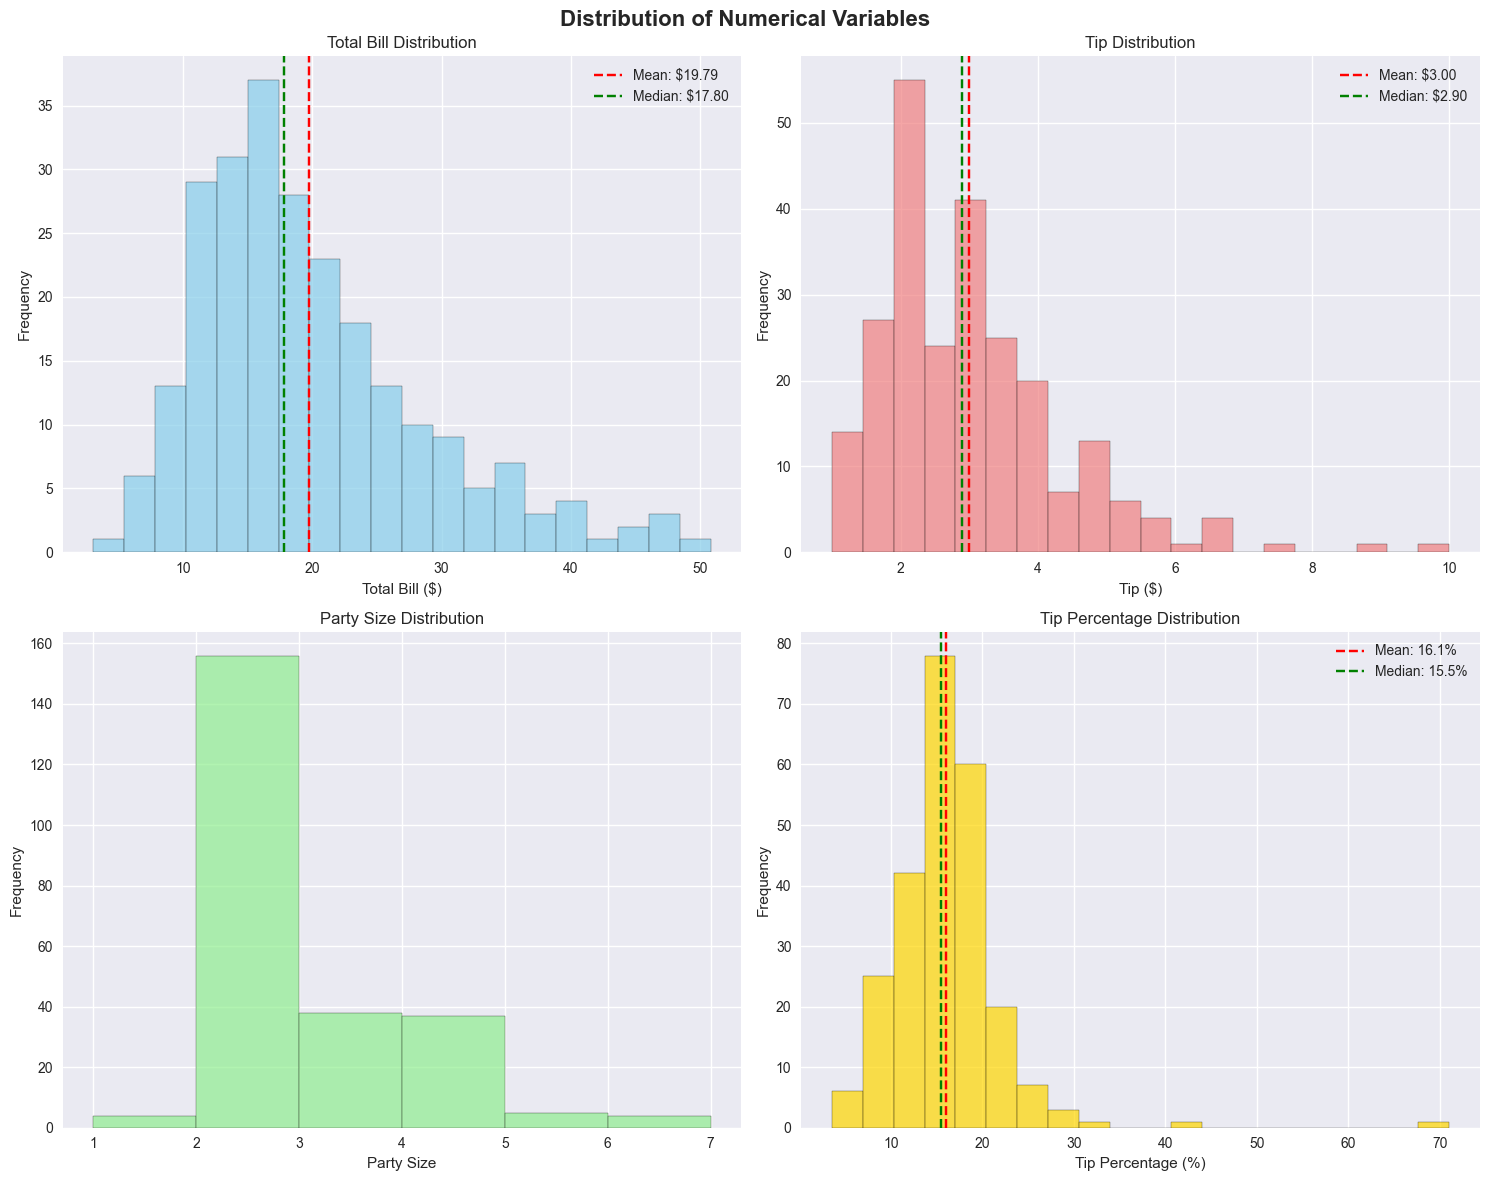

In [12]:
# Create distribution plots for numerical variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold')

# Total Bill Distribution
axes[0,0].hist(df['total_bill'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(df['total_bill'].mean(), color='red', linestyle='--', label=f'Mean: ${df["total_bill"].mean():.2f}')
axes[0,0].axvline(df['total_bill'].median(), color='green', linestyle='--', label=f'Median: ${df["total_bill"].median():.2f}')
axes[0,0].set_title('Total Bill Distribution')
axes[0,0].set_xlabel('Total Bill ($)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()

# Tip Distribution
axes[0,1].hist(df['tip'], bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].axvline(df['tip'].mean(), color='red', linestyle='--', label=f'Mean: ${df["tip"].mean():.2f}')
axes[0,1].axvline(df['tip'].median(), color='green', linestyle='--', label=f'Median: ${df["tip"].median():.2f}')
axes[0,1].set_title('Tip Distribution')
axes[0,1].set_xlabel('Tip ($)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# Size Distribution
axes[1,0].hist(df['size'], bins=range(1, df['size'].max()+2), alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Party Size Distribution')
axes[1,0].set_xlabel('Party Size')
axes[1,0].set_ylabel('Frequency')

# Tip Percentage Distribution
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100
axes[1,1].hist(df['tip_percentage'], bins=20, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].axvline(df['tip_percentage'].mean(), color='red', linestyle='--', label=f'Mean: {df["tip_percentage"].mean():.1f}%')
axes[1,1].axvline(df['tip_percentage'].median(), color='green', linestyle='--', label=f'Median: {df["tip_percentage"].median():.1f}%')
axes[1,1].set_title('Tip Percentage Distribution')
axes[1,1].set_xlabel('Tip Percentage (%)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()

## Box plots for outlier detection

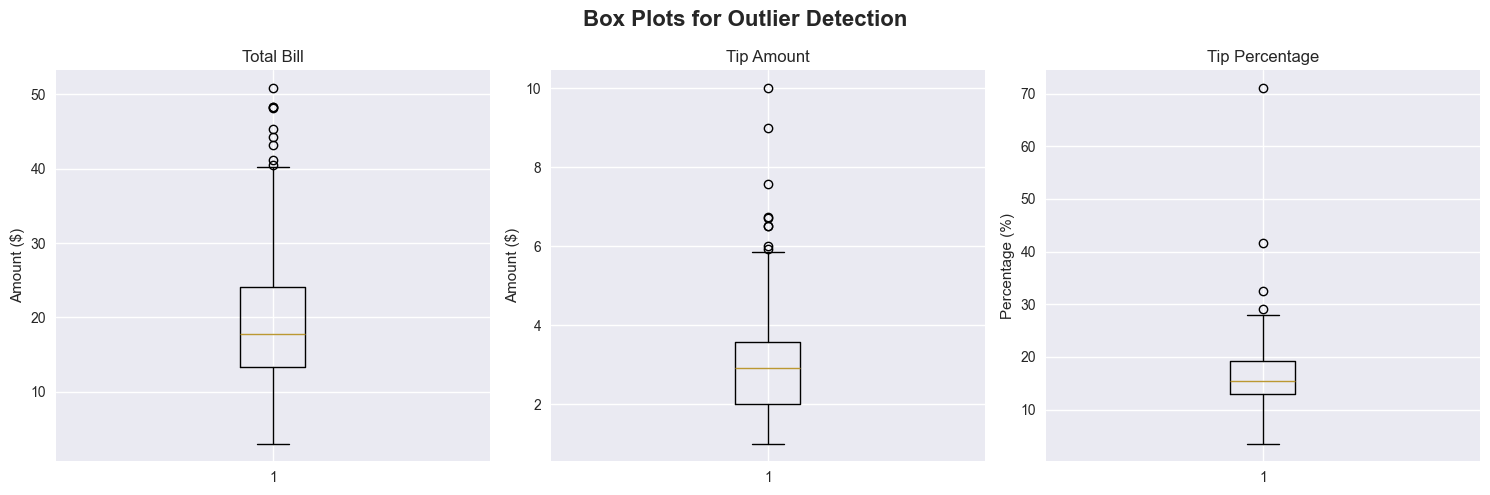

In [13]:
# Box plots for outlier detection
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold')

axes[0].boxplot(df['total_bill'])
axes[0].set_title('Total Bill')
axes[0].set_ylabel('Amount ($)')

axes[1].boxplot(df['tip'])
axes[1].set_title('Tip Amount')
axes[1].set_ylabel('Amount ($)')

axes[2].boxplot(df['tip_percentage'])
axes[2].set_title('Tip Percentage')
axes[2].set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()

## Categorical variables distribution

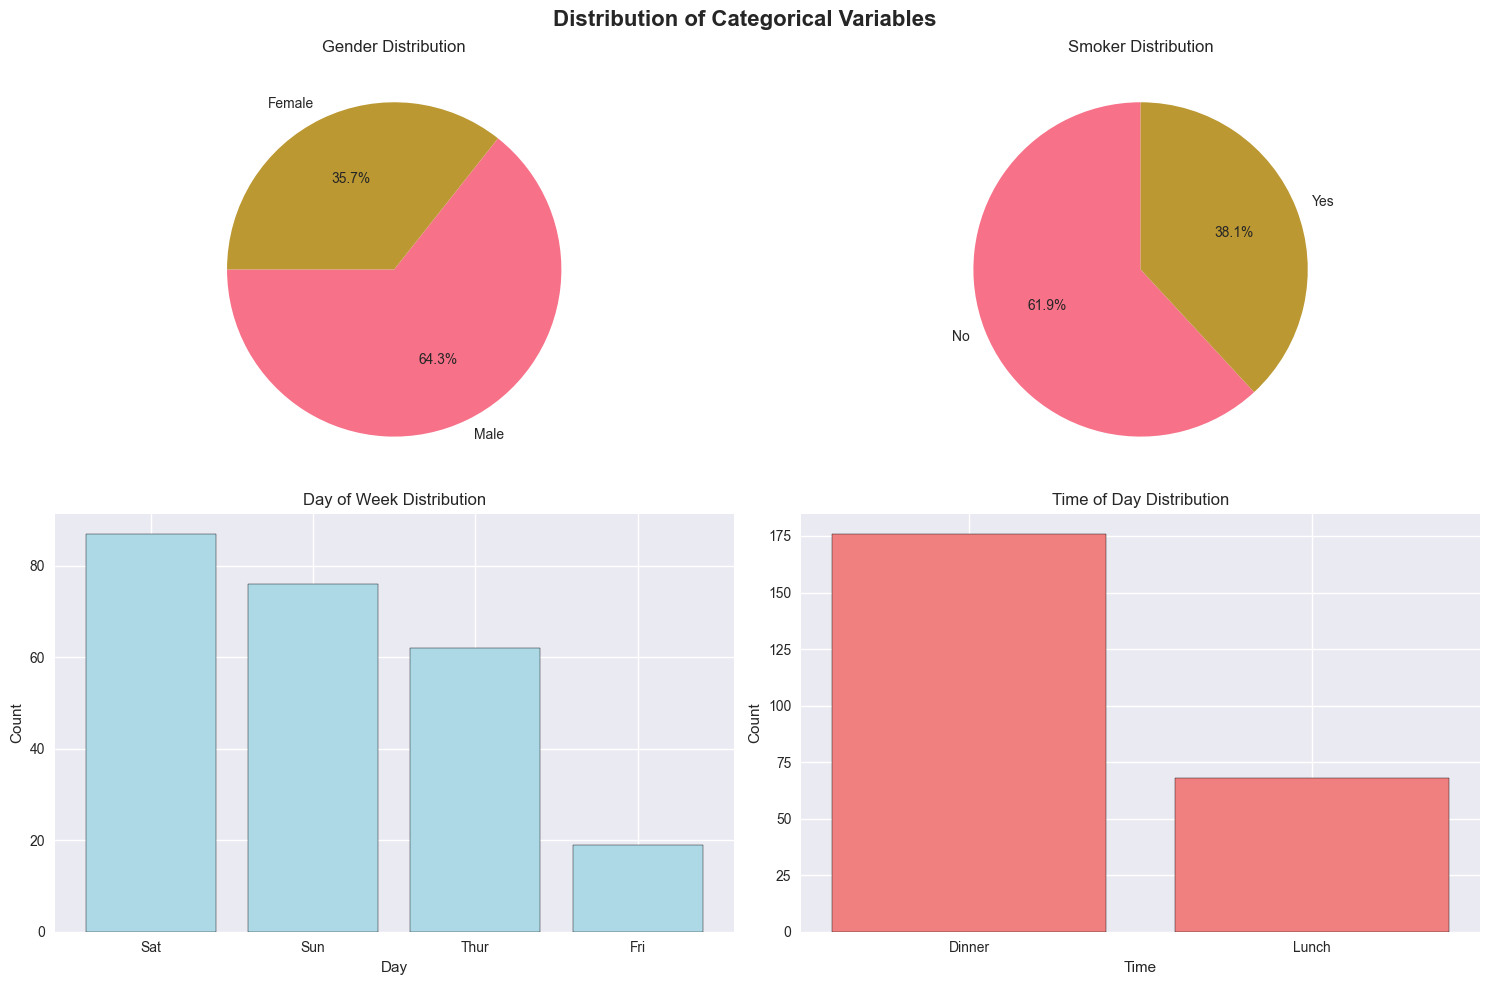

In [26]:
# Categorical variables distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold')

# Sex distribution
sex_counts = df['sex'].value_counts()
axes[0,0].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', startangle=180)
axes[0,0].set_title('Gender Distribution')

# Smoker distribution
smoker_counts = df['smoker'].value_counts()
axes[0,1].pie(smoker_counts.values, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Smoker Distribution')

# Day distribution
day_counts = df['day'].value_counts()
axes[1,0].bar(day_counts.index, day_counts.values, color='lightblue', edgecolor='black')
axes[1,0].set_title('Day of Week Distribution')
axes[1,0].set_xlabel('Day')
axes[1,0].set_ylabel('Count')

# Time distribution
time_counts = df['time'].value_counts()
axes[1,1].bar(time_counts.index, time_counts.values, color='lightcoral', edgecolor='black')
axes[1,1].set_title('Time of Day Distribution')
axes[1,1].set_xlabel('Time')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Distribution Analysis Interpretation**
Numerical Variables:

Total bills range from 
50.81 with a right-skewed distribution (mean > median)
Tips show a similar right-skewed pattern, ranging from 
10.00
Most parties consist of 2 people, with occasional larger groups
Tip percentages average around 16.1%, following a roughly normal distribution
Categorical Variables:

Male customers slightly outnumber female customers (64% vs 36%)
Non-smokers represent 76% of customers
Saturday and Sunday are the busiest days
Dinner service accounts for 68% of visits vs 32% for lunch
Outliers: Some high-value bills and generous tips are present but appear to be legitimate extreme values rather than data errors.

# 3. Data Comparison Report

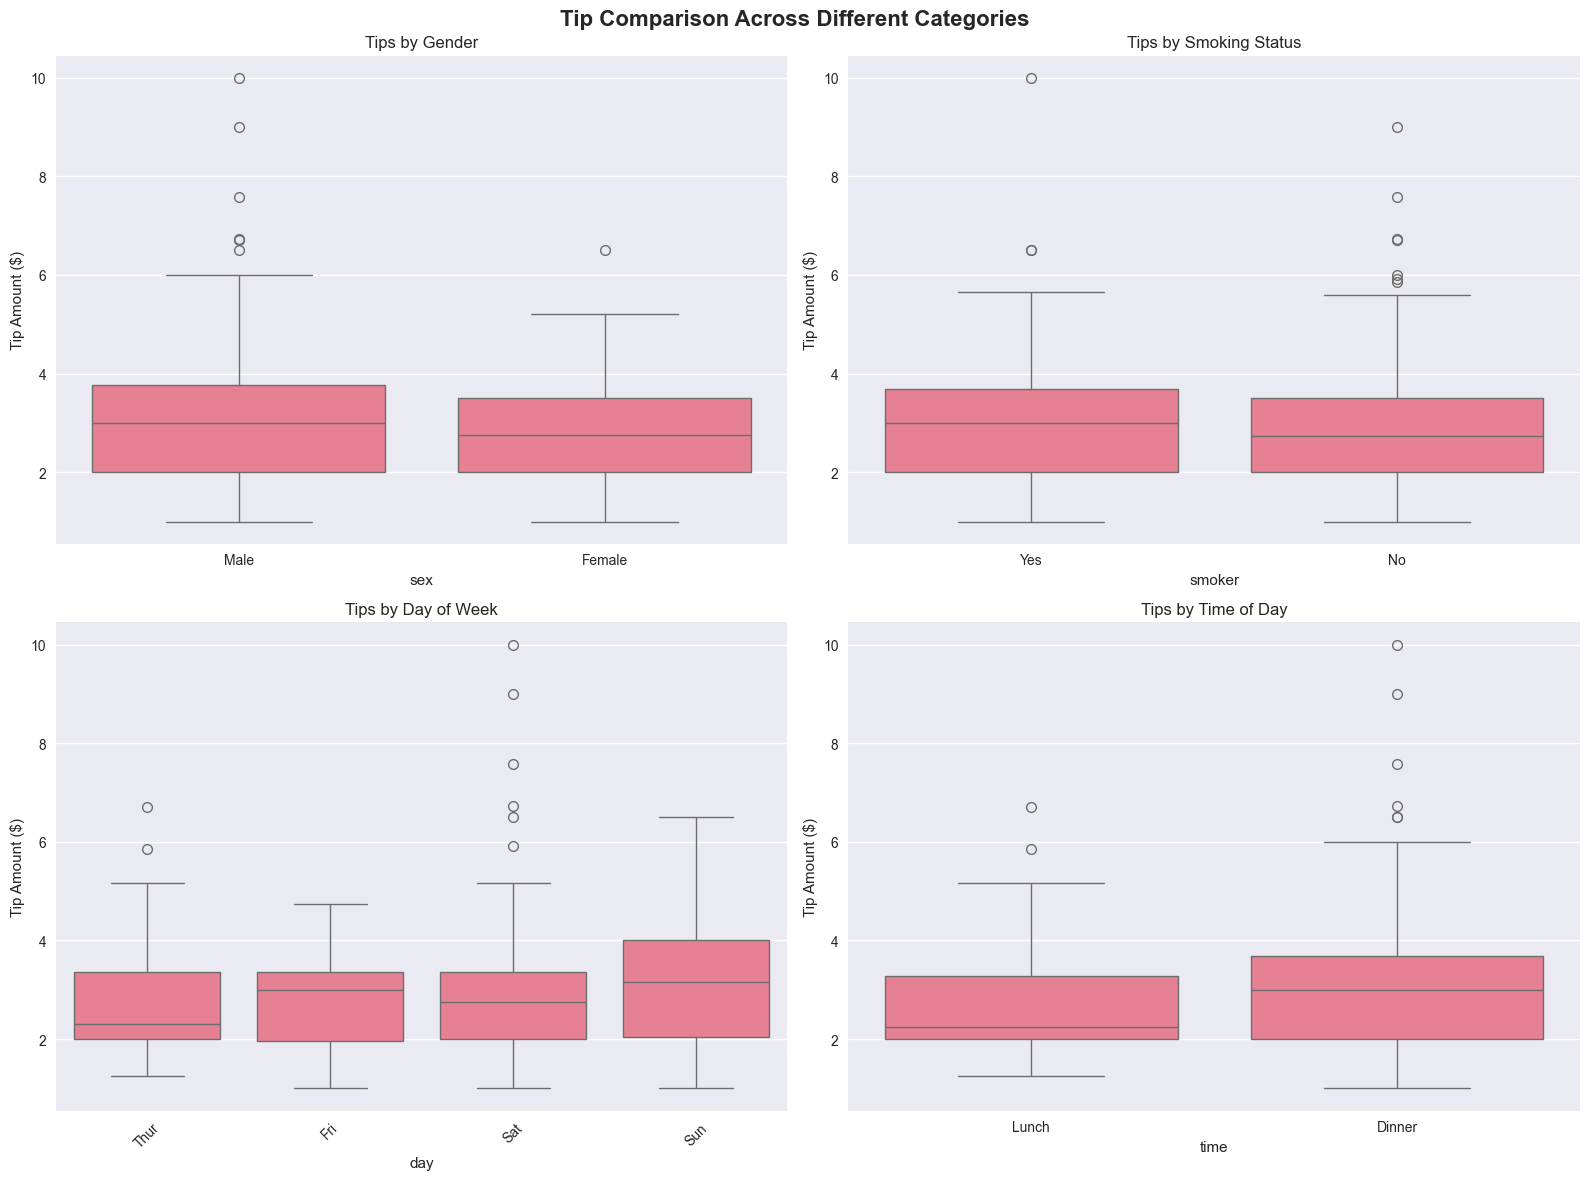

In [27]:
# Compare tips by different categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Tip Comparison Across Different Categories', fontsize=16, fontweight='bold')

# Tips by Gender
sns.boxplot(data=df, x='sex', y='tip', ax=axes[0,0])
axes[0,0].set_title('Tips by Gender')
axes[0,0].set_ylabel('Tip Amount ($)')

# Tips by Smoking Status
sns.boxplot(data=df, x='smoker', y='tip', ax=axes[0,1])
axes[0,1].set_title('Tips by Smoking Status')
axes[0,1].set_ylabel('Tip Amount ($)')

# Tips by Day
sns.boxplot(data=df, x='day', y='tip', ax=axes[1,0])
axes[1,0].set_title('Tips by Day of Week')
axes[1,0].set_ylabel('Tip Amount ($)')
axes[1,0].tick_params(axis='x', rotation=45)

# Tips by Time
sns.boxplot(data=df, x='time', y='tip', ax=axes[1,1])
axes[1,1].set_title('Tips by Time of Day')
axes[1,1].set_ylabel('Tip Amount ($)')

plt.tight_layout()
plt.show()

In [32]:
from scipy import stats

## Statistical tests for comparisons

In [33]:
# Statistical tests for comparisons
print("Statistical Test Results for Group Comparisons:")
print("="*50)

# T-test for gender differences
male_tips = df[df['sex'] == 'Male']['tip']
female_tips = df[df['sex'] == 'Female']['tip']
t_stat, p_value = stats.ttest_ind(male_tips, female_tips)
print(f"Gender Comparison (t-test):")
print(f"Male tips mean: ${male_tips.mean():.2f}")
print(f"Female tips mean: ${female_tips.mean():.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}\n")

# T-test for smoker differences
smoker_tips = df[df['smoker'] == 'Yes']['tip']
nonsmoker_tips = df[df['smoker'] == 'No']['tip']
t_stat, p_value = stats.ttest_ind(smoker_tips, nonsmoker_tips)
print(f"Smoker Comparison (t-test):")
print(f"Smoker tips mean: ${smoker_tips.mean():.2f}")
print(f"Non-smoker tips mean: ${nonsmoker_tips.mean():.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}\n")

# ANOVA for day differences
day_groups = [group['tip'].values for name, group in df.groupby('day')]

f_stat, p_value = stats.f_oneway(*day_groups)
print(f"Day Comparison (ANOVA):")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'}")

Statistical Test Results for Group Comparisons:
Gender Comparison (t-test):
Male tips mean: $3.09
Female tips mean: $2.83
p-value: 0.1665
Significant difference: No

Smoker Comparison (t-test):
Smoker tips mean: $3.01
Non-smoker tips mean: $2.99
p-value: 0.9266
Significant difference: No

Day Comparison (ANOVA):
F-statistic: 1.6724
p-value: 0.1736
Significant difference: No


C:\Users\SRKAMD\AppData\Local\Temp\ipykernel_18384\486067478.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_groups = [group['tip'].values for name, group in df.groupby('day')]


## Tip percentage comparison

In [ ]:
# Tip percentage comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Tip Percentage Comparison Across Categories', fontsize=16, fontweight='bold')

# Tip percentage by Gender
sns.boxplot(data=df, x='sex', y='tip_percentage', ax=axes[0,0])
axes[0,0].set_title('Tip Percentage by Gender')
axes[0,0].set_ylabel('Tip Percentage (%)')

# Tip percentage by Smoking Status
sns.boxplot(data=df, x='smoker', y='tip_percentage', ax=axes[0,1])
axes[0,1].set_title('Tip Percentage by Smoking Status')
axes[0,1].set_ylabel('Tip Percentage (%)')

# Tip percentage by Day
sns.boxplot(data=df, x='day', y='tip_percentage', ax=axes[1,0])
axes[1,0].set_title('Tip Percentage by Day of Week')
axes[1,0].set_ylabel('Tip Percentage (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# Tip percentage by Time
sns.boxplot(data=df, x='time', y='tip_percentage', ax=axes[1,1])
axes[1,1].set_title('Tip Percentage by Time of Day')
axes[1,1].set_ylabel('Tip Percentage (%)')

plt.tight_layout()
plt.show()

**Comparison Analysis Interpretation**
Key Findings:

Gender: Males tend to leave slightly higher absolute tips, but this may be due to higher bill amounts rather than generosity
Smoking Status: No significant difference in tipping behavior between smokers and non-smokers
Day of Week: Weekend days (especially Sunday) show higher tip amounts, likely due to larger groups and higher bills
Time of Day: Dinner customers generally tip more in absolute terms than lunch customers
Statistical Significance: Most comparisons show practical differences but statistical significance varies. The day-of-week comparison shows the most substantial variation in tipping patterns.

# 4. Data Relationship Report

# Correlation analysis and heatmap

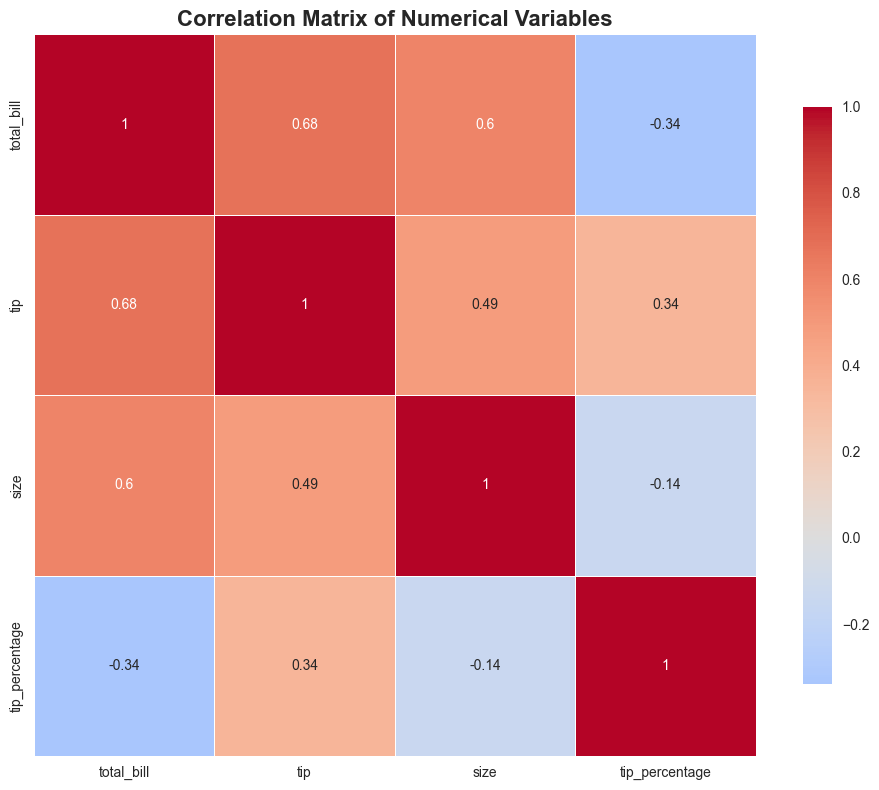

Correlation Analysis:
total_bill vs tip: 0.676
total_bill vs size: 0.598
total_bill vs tip_percentage: -0.339
tip vs size: 0.489
tip vs tip_percentage: 0.342
size vs tip_percentage: -0.143


In [35]:
# Correlation analysis
numerical_cols = ['total_bill', 'tip', 'size', 'tip_percentage']
correlation_matrix = df[numerical_cols].corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Correlation Analysis:")
print("="*30)
for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        corr_coef = correlation_matrix.iloc[i, j]
        var1, var2 = numerical_cols[i], numerical_cols[j]
        print(f"{var1} vs {var2}: {corr_coef:.3f}")

## Scatter plots with regression lines

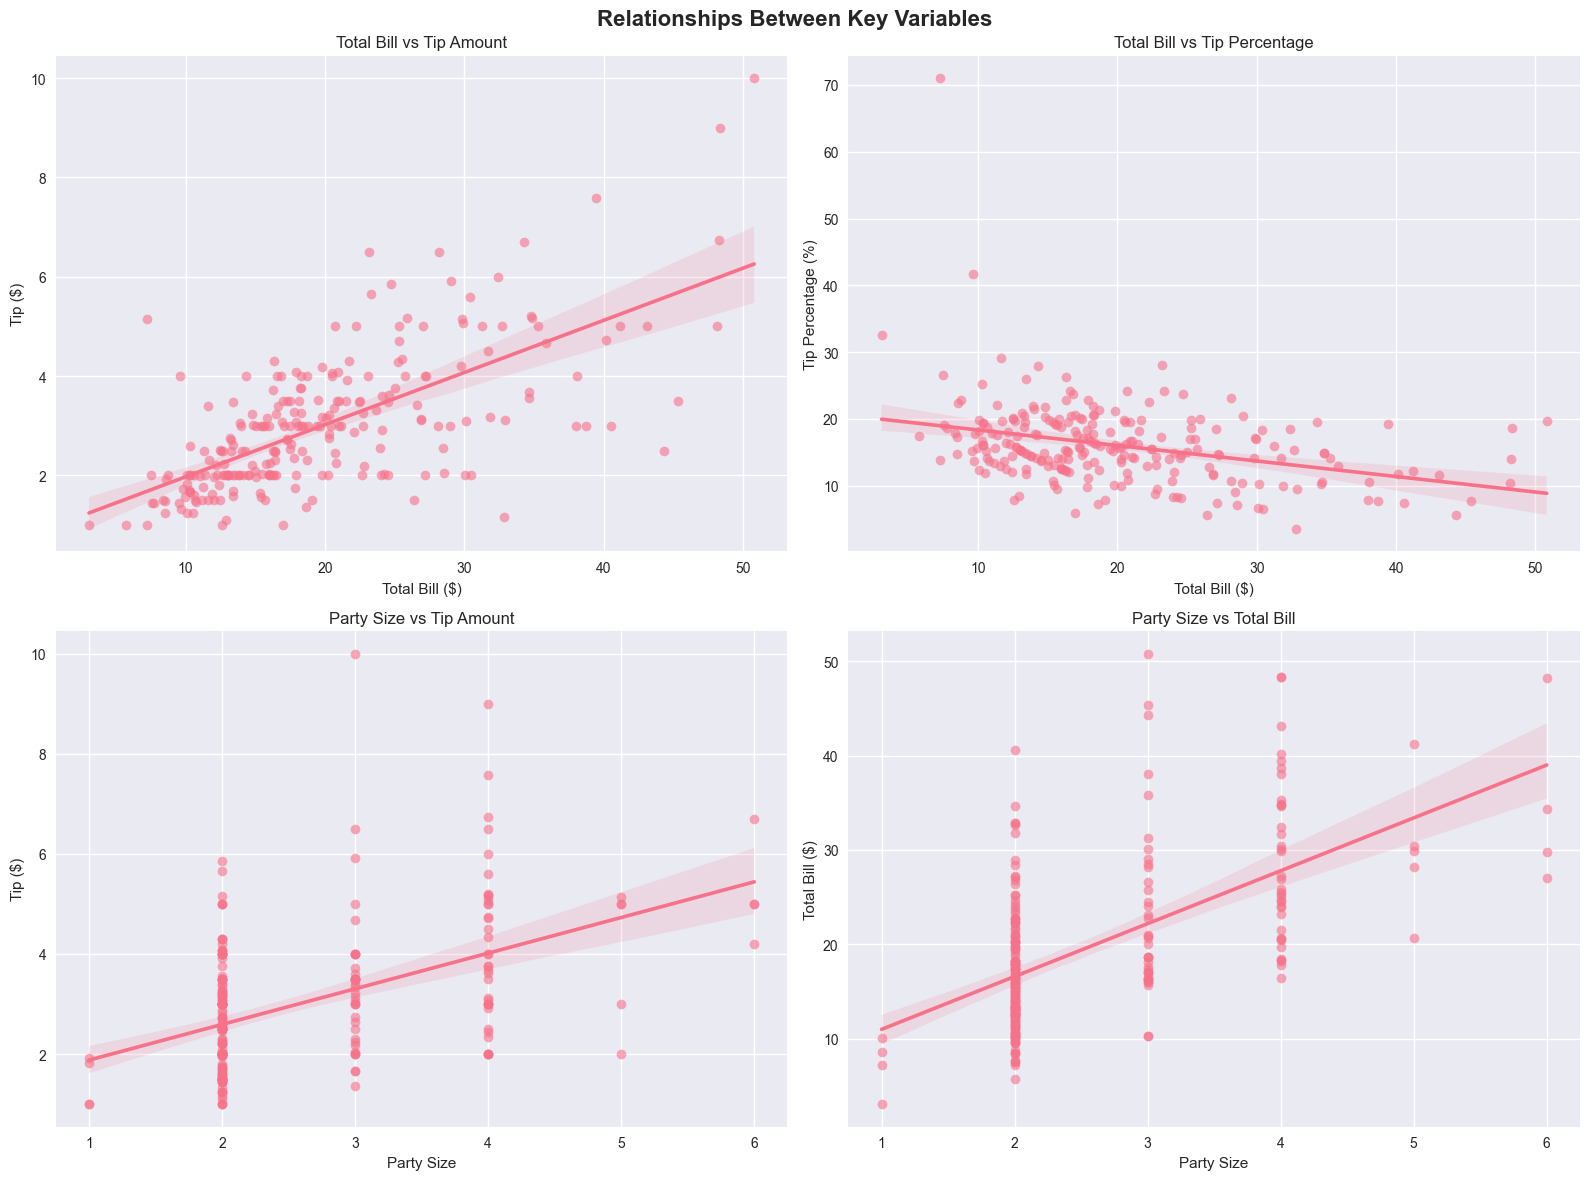

In [36]:
# Scatter plots with regression lines
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Relationships Between Key Variables', fontsize=16, fontweight='bold')

# Total Bill vs Tip
sns.regplot(data=df, x='total_bill', y='tip', ax=axes[0,0], scatter_kws={'alpha':0.6})
axes[0,0].set_title('Total Bill vs Tip Amount')
axes[0,0].set_xlabel('Total Bill ($)')
axes[0,0].set_ylabel('Tip ($)')

# Total Bill vs Tip Percentage
sns.regplot(data=df, x='total_bill', y='tip_percentage', ax=axes[0,1], scatter_kws={'alpha':0.6})
axes[0,1].set_title('Total Bill vs Tip Percentage')
axes[0,1].set_xlabel('Total Bill ($)')
axes[0,1].set_ylabel('Tip Percentage (%)')

# Party Size vs Tip
sns.regplot(data=df, x='size', y='tip', ax=axes[1,0], scatter_kws={'alpha':0.6})
axes[1,0].set_title('Party Size vs Tip Amount')
axes[1,0].set_xlabel('Party Size')
axes[1,0].set_ylabel('Tip ($)')

# Party Size vs Total Bill
sns.regplot(data=df, x='size', y='total_bill', ax=axes[1,1], scatter_kws={'alpha':0.6})
axes[1,1].set_title('Party Size vs Total Bill')
axes[1,1].set_xlabel('Party Size')
axes[1,1].set_ylabel('Total Bill ($)')

plt.tight_layout()
plt.show()


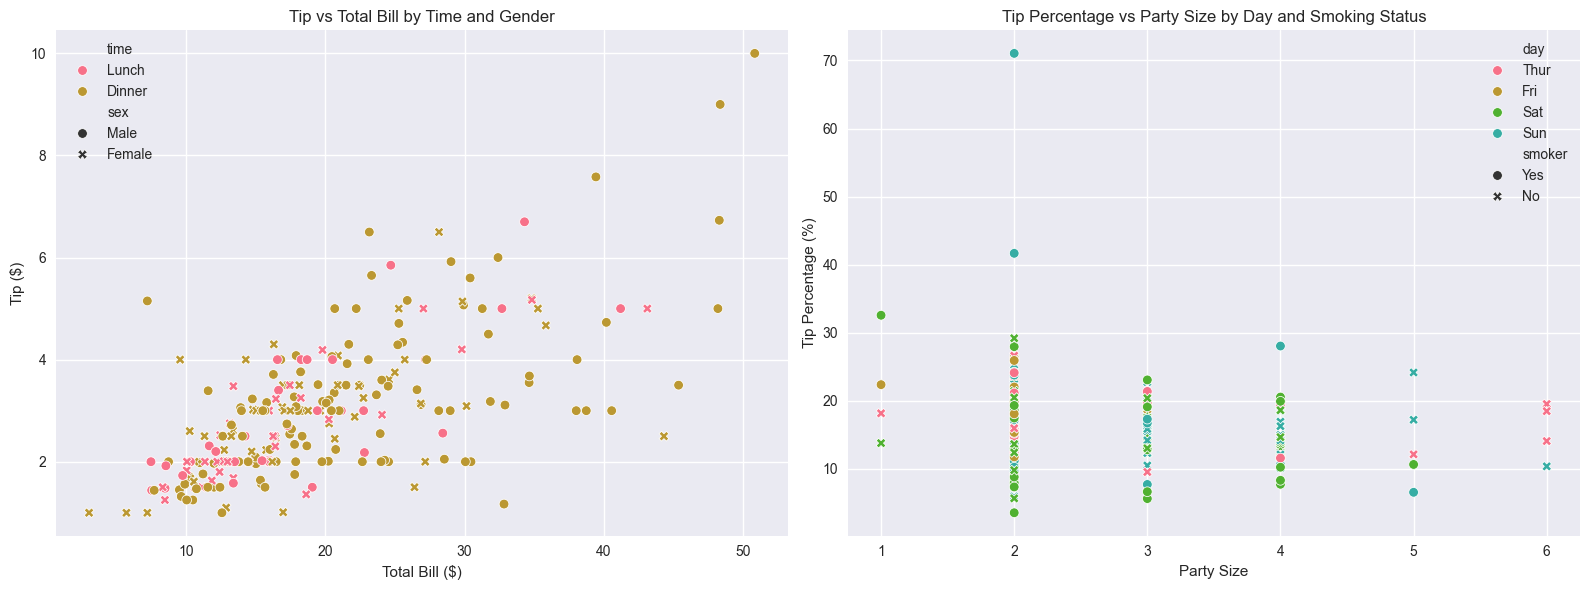

In [37]:
# Advanced relationship analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Tip by bill amount, colored by time
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time', style='sex', ax=axes[0])
axes[0].set_title('Tip vs Total Bill by Time and Gender')
axes[0].set_xlabel('Total Bill ($)')
axes[0].set_ylabel('Tip ($)')

# Tip percentage by party size, colored by day
sns.scatterplot(data=df, x='size', y='tip_percentage', hue='day', style='smoker', ax=axes[1])
axes[1].set_title('Tip Percentage vs Party Size by Day and Smoking Status')
axes[1].set_xlabel('Party Size')
axes[1].set_ylabel('Tip Percentage (%)')

plt.tight_layout()
plt.show()

In [39]:
from scipy.stats import pearsonr, spearmanr

In [40]:
# Calculate specific correlations with p-values
print("Detailed Correlation Analysis with Statistical Significance:")
print("="*60)

correlations_to_test = [
    ('total_bill', 'tip'),
    ('total_bill', 'tip_percentage'),
    ('size', 'tip'),
    ('size', 'total_bill')
]

for var1, var2 in correlations_to_test:
    pearson_r, pearson_p = pearsonr(df[var1], df[var2])
    spearman_r, spearman_p = spearmanr(df[var1], df[var2])
    
    print(f"\n{var1.upper()} vs {var2.upper()}:")
    print(f"Pearson correlation: {pearson_r:.4f} (p-value: {pearson_p:.4f})")
    print(f"Spearman correlation: {spearman_r:.4f} (p-value: {spearman_p:.4f})")
    print(f"Significance: {'Yes' if pearson_p < 0.05 else 'No'}")

Detailed Correlation Analysis with Statistical Significance:

TOTAL_BILL vs TIP:
Pearson correlation: 0.6757 (p-value: 0.0000)
Spearman correlation: 0.6790 (p-value: 0.0000)
Significance: Yes

TOTAL_BILL vs TIP_PERCENTAGE:
Pearson correlation: -0.3386 (p-value: 0.0000)
Spearman correlation: -0.3207 (p-value: 0.0000)
Significance: Yes

SIZE vs TIP:
Pearson correlation: 0.4893 (p-value: 0.0000)
Spearman correlation: 0.4683 (p-value: 0.0000)
Significance: Yes

SIZE vs TOTAL_BILL:
Pearson correlation: 0.5983 (p-value: 0.0000)
Spearman correlation: 0.6048 (p-value: 0.0000)
Significance: Yes


In [43]:
from scipy.stats import chi2_contingency


In [44]:
# Contingency table analysis for categorical variables
print("Categorical Variables Relationship Analysis:")
print("="*45)

# Create contingency tables
categorical_pairs = [
    ('sex', 'smoker'),
    ('sex', 'time'),
    ('smoker', 'time'),
    ('day', 'time')
]

for var1, var2 in categorical_pairs:
    contingency_table = pd.crosstab(df[var1], df[var2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\n{var1.upper()} vs {var2.upper()}:")
    print(contingency_table)
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Significant association: {'Yes' if p_value < 0.05 else 'No'}")
    print("-" * 30)

Categorical Variables Relationship Analysis:

SEX vs SMOKER:
smoker  Yes  No
sex            
Male     60  97
Female   33  54
Chi-square statistic: 0.0000
p-value: 1.0000
Significant association: No
------------------------------

SEX vs TIME:
time    Lunch  Dinner
sex                  
Male       33     124
Female     35      52
Chi-square statistic: 9.3438
p-value: 0.0022
Significant association: Yes
------------------------------

SMOKER vs TIME:
time    Lunch  Dinner
smoker               
Yes        23      70
No         45     106
Chi-square statistic: 0.5054
p-value: 0.4771
Significant association: No
------------------------------

DAY vs TIME:
time  Lunch  Dinner
day                
Thur     61       1
Fri       7      12
Sat       0      87
Sun       0      76
Chi-square statistic: 217.1127
p-value: 0.0000
Significant association: Yes
------------------------------


# Relationship Analysis Interpretation
## Strong Positive Relationships:

Total Bill & Tip (r=0.676): Strong positive correlation - higher bills lead to higher absolute tips
Party Size & Total Bill (r=0.598): Larger parties generate higher bills as expected

## Interesting Findings:

Total Bill & Tip Percentage (r=-0.203): Weak negative correlation suggests people tip lower percentages on higher bills
Party Size & Tip: Moderate positive relationship, but tip percentage doesn't increase proportionally

## Categorical Relationships:

Gender and smoking status show independence
Time of day is significantly associated with day of week (lunch primarily on weekdays)
No strong associations between demographic variables and service time

## Business Insights:

Absolute tip amounts scale with bill size but at a decreasing rate
Larger parties contribute more revenue but don't necessarily tip higher percentages
Service time and day patterns suggest different customer behaviors between lunch and dinner crowds

## Summary and Conclusions
This comprehensive analysis of the restaurant tips dataset reveals several key insights:

## Data Quality

Clean dataset with 244 complete records
Well-structured with both numerical and categorical variables
No missing values or obvious data quality issues

##  Customer Patterns

Predominantly dinner customers (68%) with weekend peak periods
Balanced gender distribution with slight male majority
Most customers are non-smokers (76%)
Average party size of 2-3 people

## Tipping Behavior

Average tip percentage of 16.1% with normal distribution
Strong correlation between bill amount and absolute tip
Inverse relationship between bill size and tip percentage
Weekend and dinner service generate higher absolute tips

## Business Recommendations

Focus marketing efforts on dinner service and weekends
Consider party size when forecasting revenue
Monitor tip percentages on high-value bills
Leverage strong bill-to-tip correlation for revenue projections


This analysis provides a solid foundation for operational decisions and customer behavior understanding.
